# 인공 신경망 

In [114]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family= 'Noto Sans CJK JP')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [96]:
df_raw=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/HMEQ.csv", encoding='euc-kr')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [97]:
df_raw.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [98]:
df_raw["JOB"].fillna("Other", inplace=True)

In [99]:
df_raw.fillna(df_raw.mean(), inplace=True)

In [100]:
df_raw_x=df_raw.drop("BAD", axis=1, inplace=False)

In [101]:
df_raw_y=df_raw["BAD"]

In [102]:
display("설명변수:",df_raw_x.head())
display("목표변수:",df_raw_y.head())

'설명변수:'

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


'목표변수:'

0    1
1    1
2    0
3    1
4    0
Name: BAD, dtype: int64

In [103]:
df_raw_x_num=df_raw_x.select_dtypes(exclude="object")

In [104]:
v_feature_names=df_raw_x_num.columns

In [105]:
scaler=StandardScaler()

In [106]:
df_x_scaled=scaler.fit_transform(df_raw_x_num)
df_x_scaled=pd.DataFrame(df_x_scaled, columns=v_feature_names)

In [107]:
display("Scale 변환 전:", df_raw_x_num.head())
display("Scale 변환 후:", df_x_scaled.head())


'Scale 변환 전:'

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894
2,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503
3,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601
4,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827


'Scale 변환 후:'

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684
3,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725
4,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456


In [108]:
df_raw_x_char= df_raw_x.select_dtypes(include="object")

In [109]:
df_x_dummy=pd.get_dummies(df_raw_x_char)
df_x_dummy.head()

,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,0,1,0,0,1,0,0,0
1,0,1,0,0,1,0,0,0
2,0,1,0,1,0,0,0,0
3,0,1,1,0,0,0,0,0
4,0,1,0,1,0,0,0,0


In [110]:
display("Dummy 변환 전:",df_raw_x_char.head())
display("Dummy 변환 후:",df_x_dummy.head())

'Dummy 변환 전:'

,REASON,JOB
0,HomeImp,Other
1,HomeImp,Other
2,HomeImp,Office
3,HomeImp,Mgr
4,HomeImp,Office


'Dummy 변환 후:'

,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,0,1,0,0,1,0,0,0
1,0,1,0,0,1,0,0,0
2,0,1,0,1,0,0,0,0
3,0,1,1,0,0,0,0,0
4,0,1,0,1,0,0,0,0


In [111]:
df_x_converted= df_x_scaled.join(df_x_dummy)
display("변환 전:", df_raw_x.head())
display("Scale/Dummy 변환 후:", df_x_converted.head())

'변환 전:'

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


'Scale/Dummy 변환 후:'

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,0,1,0,0,1,0,0,0
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,0,1,0,0,1,0,0,0
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,0,1,0,1,0,0,0,0
3,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,0,1,1,0,0,0,0,0
4,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,0,1,0,1,0,0,0,0


In [112]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_converted, df_raw_y,test_size=0.3, random_state=1234)
print("분할 전 Train Data:{}".format(df_train_x.shape))
print("분할 후 Test Data:{}".format(df_test_x.shape))

분할 전 Train Data:(2623, 18)
분할 후 Test Data:(1125, 18)


In [115]:
nn_uncust=MLPClassifier(random_state=1234)

In [116]:
nn_uncust.fit(df_train_x,df_train_y)

MLPClassifier(random_state=1234)

In [117]:
print("Accurary on training: {:.3f}".format(nn_uncust.score(df_train_x,df_train_y)))
print("Accuracy on test set: {:.3f}".format(nn_uncust.score(df_test_x,df_test_y)))

Accurary on training: 0.971
Accuracy on test set: 0.940


In [118]:
print(nn_uncust.get_params().keys())
print(nn_uncust.get_params().values())

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
dict_values(['relu', 0.0001, 'auto', 0.9, 0.999, False, 1e-08, (100,), 'constant', 0.001, 15000, 200, 0.9, 10, True, 0.5, 1234, True, 'adam', 0.0001, 0.1, False, False])


In [122]:
train_accuracy=[]; test_accuracy=[]
para_hidden=[5*hidden for hidden in range(1,21)]

print(para_hidden)
for v_hidden in para_hidden:
    nn= MLPClassifier(hidden_layer_sizes=(v_hidden,v_hidden),random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x,df_test_y))

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


In [123]:
df_accuracy_hidden= pd.DataFrame()
df_accuracy_hidden["HiddenLayer"]=para_hidden
df_accuracy_hidden["TrainScore"]= train_accuracy
df_accuracy_hidden["TestScore"]=test_accuracy
df_accuracy_hidden.round(3)


,HiddenLayer,TrainScore,TestScore
0,5,0.930,0.928
1,10,0.940,0.931
2,15,0.968,0.943
3,20,0.973,0.948
4,25,0.981,0.941
5,30,0.986,0.946
6,35,0.989,0.951
7,40,0.995,0.952
8,45,0.995,0.948
9,50,0.998,0.956


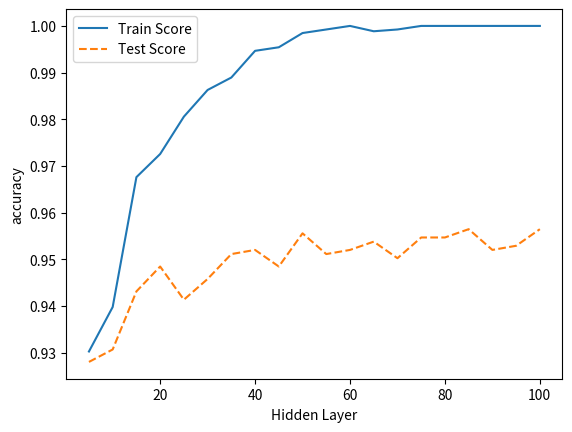

In [124]:
plt.plot(para_hidden, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_hidden, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("Hidden Layer"); plt.ylabel("accuracy")
plt.legend()

In [126]:
train_accuracy=[]; test_accuracy=[]
para_function=["logistic","tanh","relu"]

for v_function in para_function:
    nn= MLPClassifier(activation=v_function,hidden_layer_sizes=(80,80),random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x,df_test_y))

In [127]:
df_accuracy_function= pd.DataFrame()
df_accuracy_function["ActivationFunction"]=para_function
df_accuracy_function["TrainScore"]= train_accuracy
df_accuracy_function["TestScore"]=test_accuracy
df_accuracy_function.round(3)


,ActivationFunction,TrainScore,TestScore
0,logistic,0.932,0.926
1,tanh,0.998,0.951
2,relu,1.000,0.955


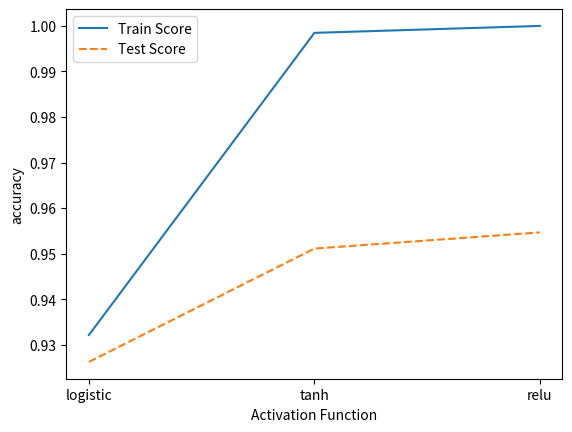

In [128]:
plt.plot(para_function, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_function, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("Activation Function"); plt.ylabel("accuracy")
plt.legend()

In [129]:
train_accuracy=[]; test_accuracy=[]
para_solver=["lbfgs","sgd","adam"]

for v_solver in para_solver:
    nn= MLPClassifier(solver=v_solver,activation="relu",hidden_layer_sizes=(80,80),random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x,df_test_y))

In [130]:
df_accuracy_solver= pd.DataFrame()
df_accuracy_solver["Solver"]=para_solver
df_accuracy_solver["TrainScore"]= train_accuracy
df_accuracy_solver["TestScore"]=test_accuracy
df_accuracy_solver.round(3)


,Solver,TrainScore,TestScore
0,lbfgs,1.000,0.947
1,sgd,0.932,0.930
2,adam,1.000,0.955


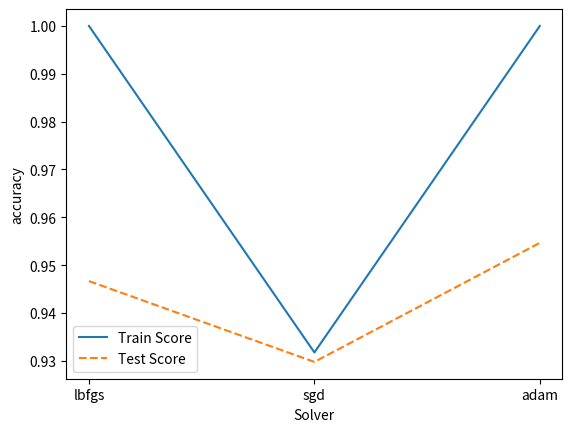

In [132]:
plt.plot(para_solver, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_solver, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("Solver"); plt.ylabel("accuracy")
plt.legend()

In [136]:
train_accuracy=[]; test_accuracy=[]
para_batch=[20*batch for batch in range(1,10)]

print(para_batch)
for v_batch in para_batch:
    nn= MLPClassifier(batch_size=v_batch,solver="adam",activation="relu",hidden_layer_sizes=(80,80),random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x,df_test_y))

[20, 40, 60, 80, 100, 120, 140, 160, 180]


In [ ]:
df_accuracy_batch= pd.DataFrame()
df_accuracy_batch["Mini batch"]=para_hidden
df_accuracy_batch["TrainScore"]= train_accuracy
df_accuracy_batch["TestScore"]=test_accuracy
df_accuracy_batch.round(3)


In [139]:
df_accuracy_batch= pd.DataFrame()
df_accuracy_batch["Mini batch"]=para_hidden
df_accuracy_batch["TrainScore"]= train_accuracy
df_accuracy_batch["TestScore"]=test_accuracy
df_accuracy_batch.round(3)


,Mini batch,TrainScore,TestScore
0,20,1.0,0.957
1,40,1.0,0.952
2,60,1.0,0.955
3,80,1.0,0.951
4,100,1.0,0.949
5,120,1.0,0.953
6,140,1.0,0.953
7,160,1.0,0.950
8,180,1.0,0.953


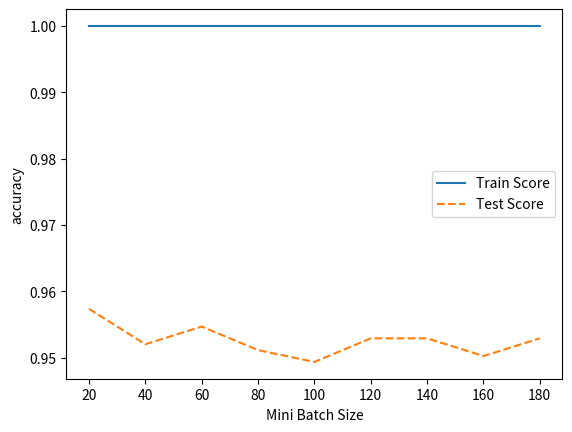

In [140]:
plt.plot(para_batch, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_batch, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("Mini Batch Size"); plt.ylabel("accuracy")
plt.legend()

In [141]:
nn_final= MLPClassifier(hidden_layer_sizes=(80,80),activation="relu",solver="adam",random_state=1234)
nn_final.fit(df_train_x,df_train_y)
y_pred=nn_final.predict(df_test_x)


In [142]:
print("Train Accurary: {:.3f}".format(nn_final.score(df_train_x,df_train_y)))
print("Test Accuracy: {:.3f}".format(nn_final.score(df_test_x,df_test_y)))
print("Test Confusion Matrix:\n{}".format(confusion_matrix(df_test_y , y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

Train Accurary: 1.000
Test Accuracy: 0.955
Test Confusion Matrix:
[[1018    3]
 [  48   56]]
              precision    recall  f1-score   support

           0      0.955     0.997     0.976      1021
           1      0.949     0.538     0.687       104

    accuracy                          0.955      1125
   macro avg      0.952     0.768     0.831      1125
weighted avg      0.954     0.955     0.949      1125

